# 📊 Cybersecurity Jobs & Salaries Analysis

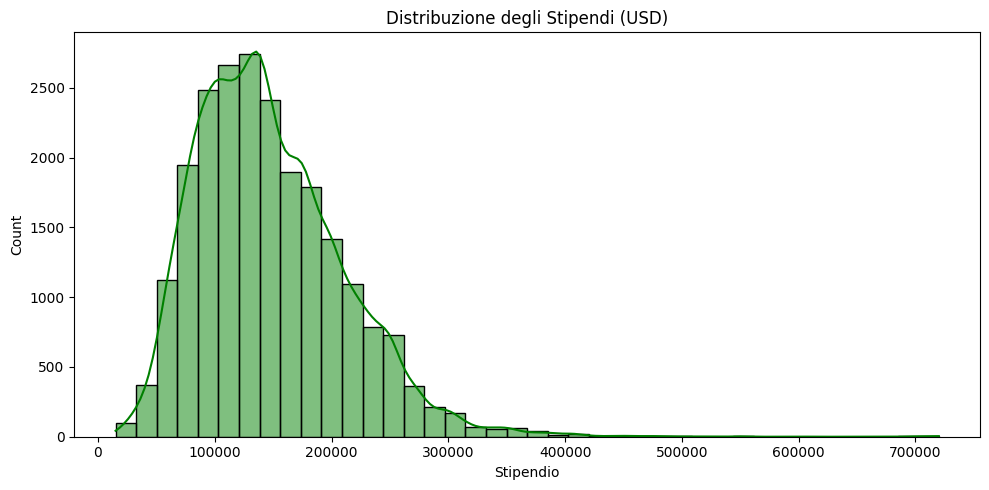

C:\Users\ab161\AppData\Local\Temp\ipykernel_18884\1377084633.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='experience_level', y='salary_in_usd', palette='Set2')


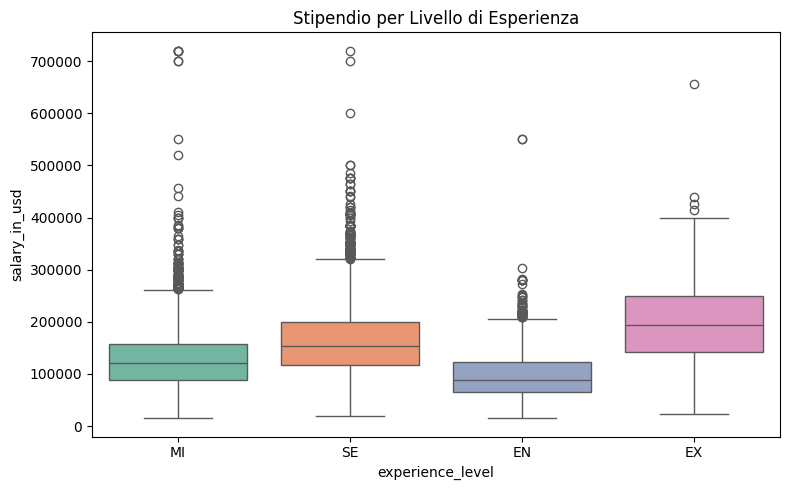

C:\Users\ab161\AppData\Local\Temp\ipykernel_18884\1377084633.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df[df['job_title'].isin(top_roles)],


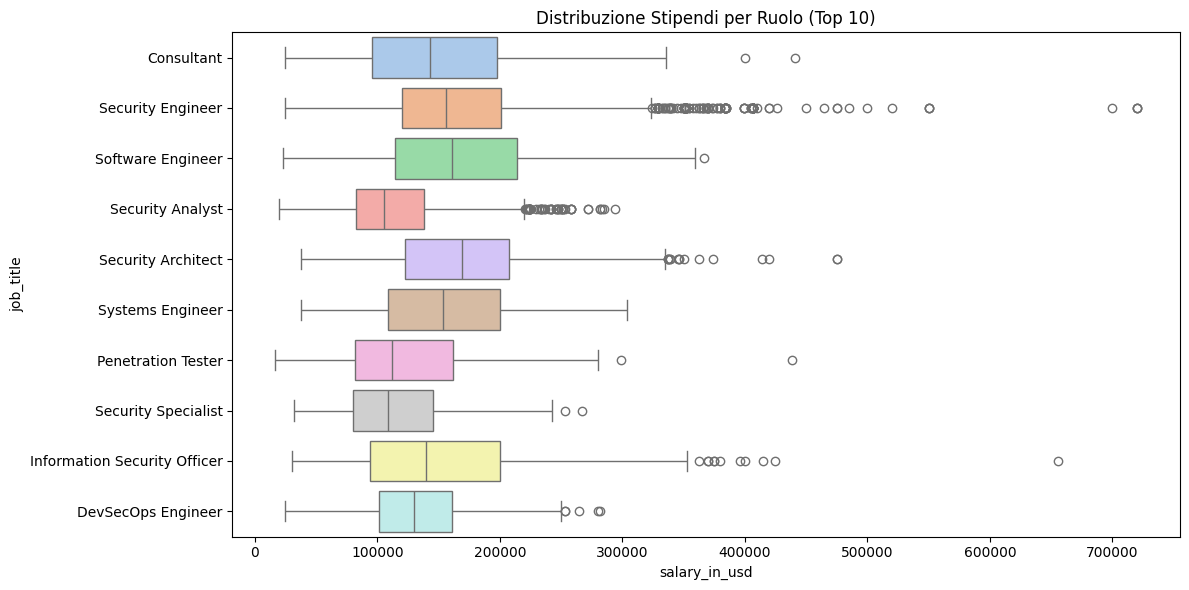

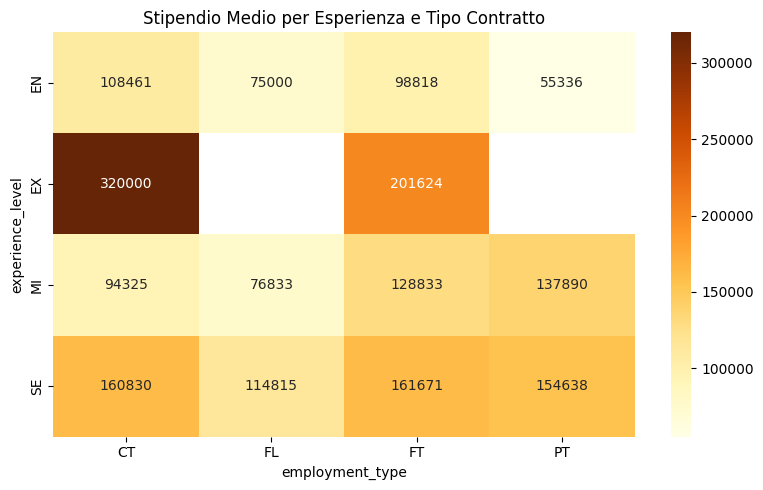

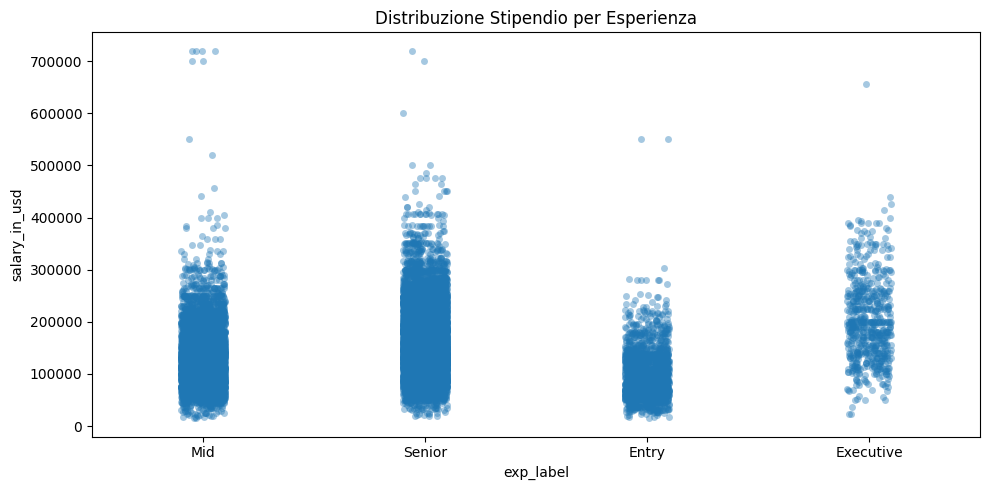

C:\Users\ab161\AppData\Local\Temp\ipykernel_18884\1377084633.py:62: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




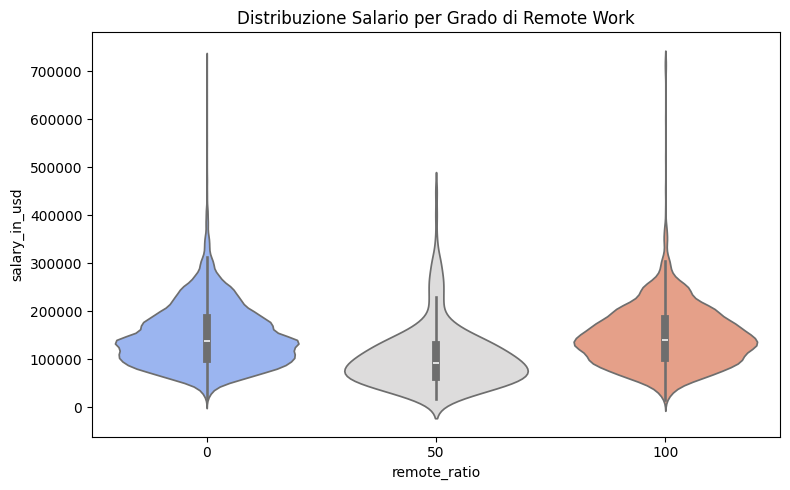

C:\Users\ab161\AppData\Local\Temp\ipykernel_18884\1377084633.py:77: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




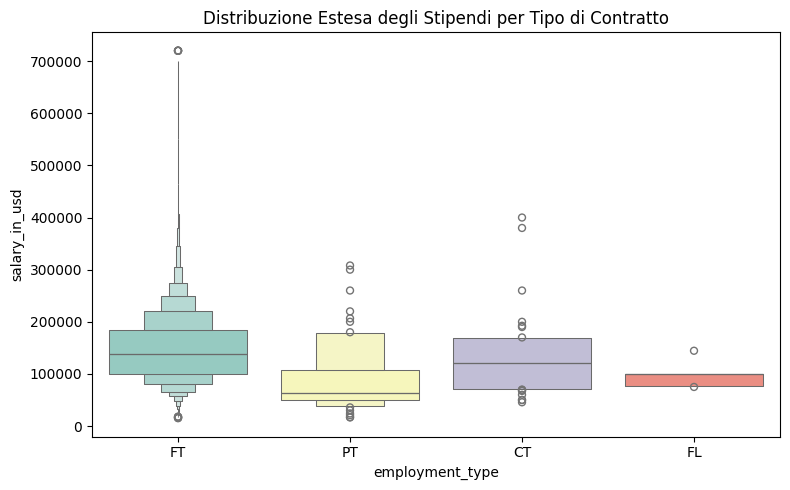

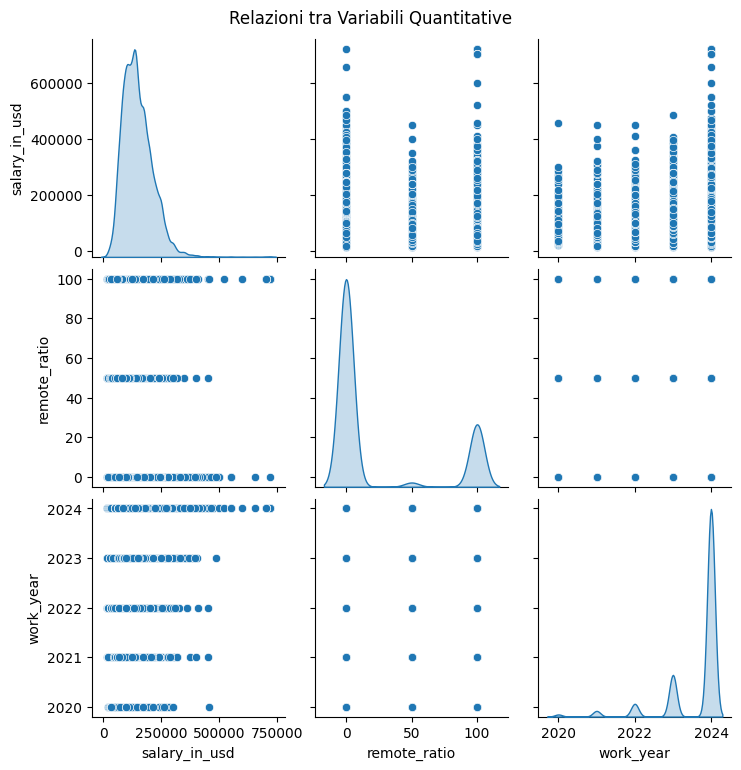

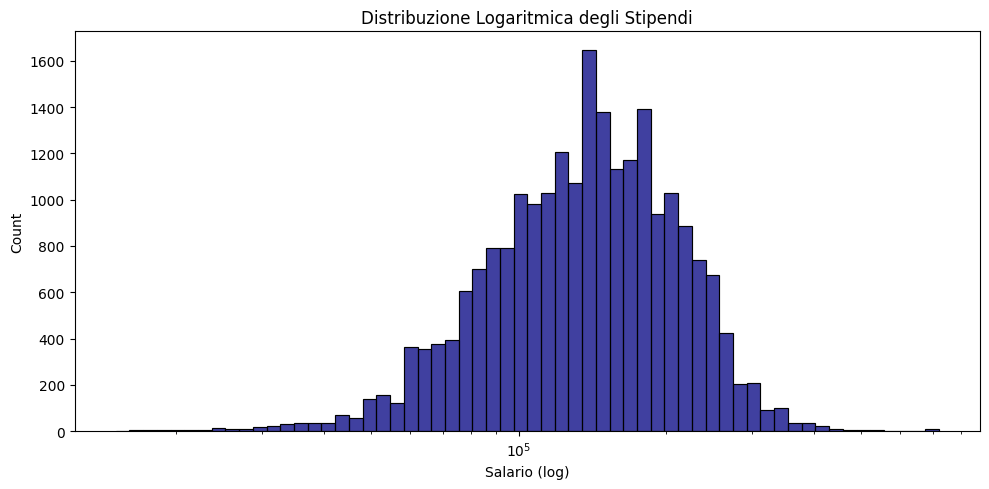

C:\Users\ab161\AppData\Local\Temp\ipykernel_18884\1377084633.py:102: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




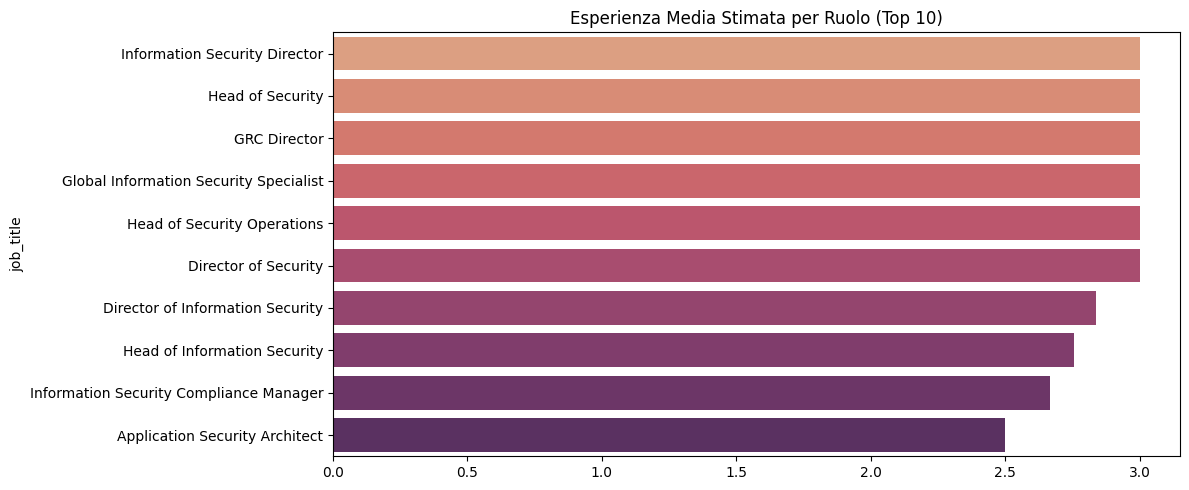

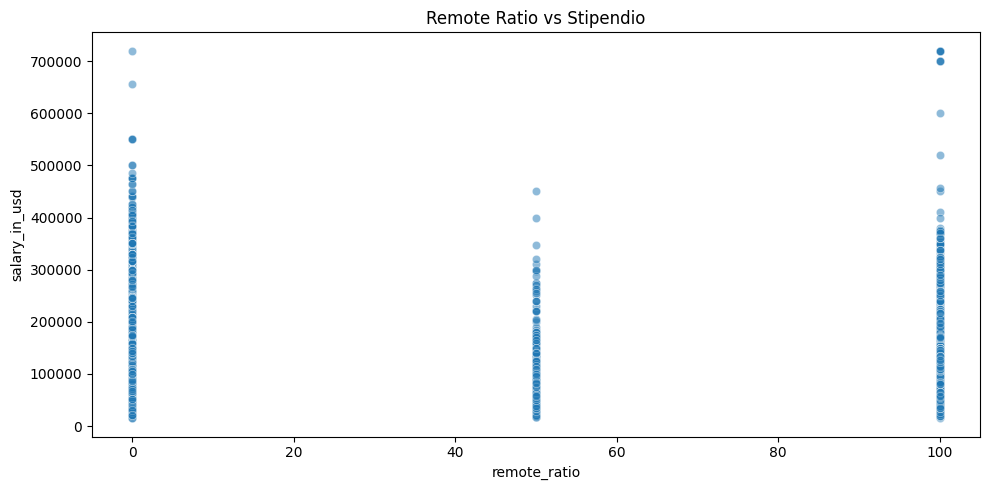

C:\Users\ab161\AppData\Local\Temp\ipykernel_18884\1377084633.py:121: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




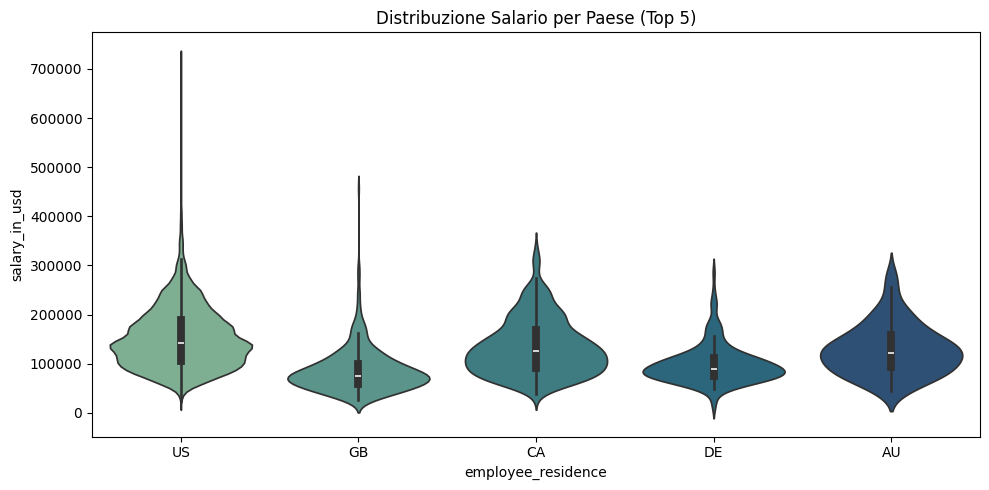

C:\Users\ab161\AppData\Local\Temp\ipykernel_18884\1377084633.py:128: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




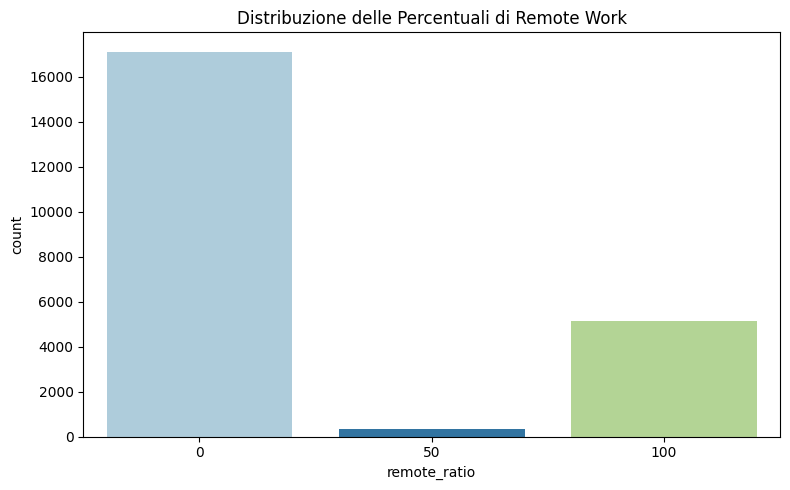

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

df = pd.read_csv("salaries.csv")
df.columns = df.columns.str.strip()
df = df.dropna(subset=['salary_in_usd', 'job_title', 'experience_level', 'employment_type', 'employee_residence'])

plt.figure(figsize=(10,5))
sns.histplot(df['salary_in_usd'], bins=40, kde=True, color='green')
plt.title("Distribuzione degli Stipendi (USD)")
plt.xlabel("Stipendio")
plt.tight_layout()
plt.show()

plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='experience_level', y='salary_in_usd', palette='Set2')
plt.title("Stipendio per Livello di Esperienza")
plt.tight_layout()
plt.show()

top_roles = df['job_title'].value_counts().nlargest(10).index
plt.figure(figsize=(12,6))
sns.boxplot(data=df[df['job_title'].isin(top_roles)],
            x='salary_in_usd', y='job_title', palette='pastel')
plt.title("Distribuzione Stipendi per Ruolo (Top 10)")
plt.tight_layout()
plt.show()

heat_data = df.pivot_table(index='experience_level', columns='employment_type',
                           values='salary_in_usd', aggfunc='mean')
plt.figure(figsize=(8,5))
sns.heatmap(heat_data, annot=True, fmt='.0f', cmap="YlOrBr")
plt.title("Stipendio Medio per Esperienza e Tipo Contratto")
plt.tight_layout()
plt.show()

fig1 = px.sunburst(df, path=['experience_level', 'employment_type', 'remote_ratio'],
                   values='salary_in_usd', title="Struttura Occupazionale per Esperienza, Contratto e Remote Work")
fig1.show()

exp_map = {'EN': 'Entry', 'MI': 'Mid', 'SE': 'Senior', 'EX': 'Executive'}
df['exp_label'] = df['experience_level'].map(exp_map)
plt.figure(figsize=(10,5))
sns.stripplot(data=df, x='exp_label', y='salary_in_usd', jitter=True, alpha=0.4)
plt.title("Distribuzione Stipendio per Esperienza")
plt.tight_layout()
plt.show()

geo_avg = df.groupby('employee_residence')['salary_in_usd'].mean().reset_index()
fig2 = px.choropleth(geo_avg, locations='employee_residence', locationmode='country names',
                     color='salary_in_usd', title='Stipendio Medio per Paese')
fig2.show()

contract_dist = df['employment_type'].value_counts()
fig3 = px.pie(values=contract_dist.values, names=contract_dist.index, hole=0.4,
              title="Distribuzione dei Tipi di Contratto")
fig3.show()

plt.figure(figsize=(8,5))
sns.violinplot(data=df, x='remote_ratio', y='salary_in_usd', palette="coolwarm")
plt.title("Distribuzione Salario per Grado di Remote Work")
plt.tight_layout()
plt.show()

if 'work_year' in df.columns:
    salary_time = df.groupby(['work_year', 'job_title'])['salary_in_usd'].mean().reset_index()
    top_job = df['job_title'].value_counts().nlargest(5).index
    fig4 = px.line(salary_time[salary_time['job_title'].isin(top_job)],
                   x='work_year', y='salary_in_usd', color='job_title',
                   title="Evoluzione Stipendio per Ruolo (Top 5)")
    fig4.show()

# Estensione grafici
plt.figure(figsize=(8,5))
sns.boxenplot(data=df, x='employment_type', y='salary_in_usd', palette='Set3')
plt.title("Distribuzione Estesa degli Stipendi per Tipo di Contratto")
plt.tight_layout()
plt.show()

if 'work_year' in df.columns:
    sns.pairplot(df[['salary_in_usd', 'remote_ratio', 'work_year']], kind='scatter', diag_kind='kde')
    plt.suptitle("Relazioni tra Variabili Quantitative", y=1.02)
    plt.show()

remote_exp = df.groupby(['experience_level', 'remote_ratio'])['salary_in_usd'].mean().reset_index()
fig5 = px.bar(remote_exp, x='experience_level', y='salary_in_usd', color='remote_ratio',
              barmode='group', title="Stipendio Medio per Esperienza e Remote Work")
fig5.show()

plt.figure(figsize=(10,5))
sns.histplot(df['salary_in_usd'], bins=60, color='navy', log_scale=True)
plt.title("Distribuzione Logaritmica degli Stipendi")
plt.xlabel("Salario (log)")
plt.tight_layout()
plt.show()

avg_exp_role = df.groupby('job_title')['experience_level'].apply(lambda x: x.map({'EN':0, 'MI':1, 'SE':2, 'EX':3}).mean())
avg_exp_role = avg_exp_role.sort_values(ascending=False).head(10)
plt.figure(figsize=(12,5))
sns.barplot(x=avg_exp_role.values, y=avg_exp_role.index, palette='flare')
plt.title("Esperienza Media Stimata per Ruolo (Top 10)")
plt.tight_layout()
plt.show()

fig6 = px.treemap(df[df['job_title'].isin(top_roles)],
                  path=['experience_level', 'employment_type', 'job_title'],
                  values='salary_in_usd',
                  title="Treemap – Struttura Occupazionale per Esperienza, Contratto e Ruolo")
fig6.show()

plt.figure(figsize=(10,5))
sns.scatterplot(data=df, x='remote_ratio', y='salary_in_usd', alpha=0.5)
plt.title("Remote Ratio vs Stipendio")
plt.tight_layout()
plt.show()

top_countries = df['employee_residence'].value_counts().nlargest(5).index
plt.figure(figsize=(10,5))
sns.violinplot(data=df[df['employee_residence'].isin(top_countries)],
               x='employee_residence', y='salary_in_usd', palette='crest')
plt.title("Distribuzione Salario per Paese (Top 5)")
plt.tight_layout()
plt.show()

plt.figure(figsize=(8,5))
sns.countplot(data=df, x='remote_ratio', palette='Paired')
plt.title("Distribuzione delle Percentuali di Remote Work")
plt.tight_layout()
plt.show()

exp_dist = df['experience_level'].value_counts()
fig7 = px.pie(values=exp_dist.values, names=exp_dist.index, hole=0.5,
              title="Distribuzione dei Livelli di Esperienza")
fig7.show()